In [ ]:
import modules.vae_nn_images
import modules.savefolders
import resources.sinusoidal
from mpl_toolkits.mplot3d import axes3d, Axes3D
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
%matplotlib inline

In [ ]:
import numpy as np
from itertools import product

def sinusoid_data_generation_1D(n_Phi, n_T, omega):
    """
    Creates n_Phi sinusoidal signals with n_T points per signal each with
    angular frequency of omega.
    :param n_Phi: number of partitions of phase interval
    :param n_T: number of partitions of time interval
    :param omega: angular frequency of sinusoids
    :return: phase_range::array, time_range:: array, sinusoids::array
    """
    # Discretization of phase interval [0,2pi]
    phase_range = 2 * np.pi * np.linspace(0, 1, n_Phi)
    # Time range
    time_range = np.linspace(0, 1, n_T)
    # Signals
    sinusoids = np.sin(np.subtract.outer(phase_range, -(omega * time_range)))
    return phase_range, time_range, sinusoids

def sinusoid_from_phase(phases, n_T, omega):
    time_range = np.linspace(0, 1, n_T)
    sinusoids = np.sin(np.subtract.outer(phases, -(omega * time_range)))
    return time_range, sinusoids

def sinusoid_image_phase_combination(phases1, phases2, n_T, omega_values):
    """
    This function produces an array where each row corresponds to a sinusoidal signal with a given phase and
    angular frequency omega. The columns represent the time sampling from the interval [0,1].
    :param phases: Vector with the phases to be used
    :param n_T: Number of elements in the partition of the interval [0,1]
    :param omega: Angular frequency
    :return: np.array with shape (len(phases),n_T)
    """

    # Sampling from phase and space
    space_linspace = np.linspace(0, 1, n_T)
    # Create all possible combinations of phi_1, phi_2
    phase_combinations = np.array(list(product(phases1, phases2)))
    sinusoid_images = np.zeros((n_T, n_T, len(phase_combinations)))

    # Create spatial mesh
    spatial_mesh = np.meshgrid(space_linspace, space_linspace)

    # Generate signals for each combination
    for num_mesh, mesh_dimension in enumerate(spatial_mesh):
        # Omega*dimension
        mesh_expanded_dim = omega_values[num_mesh] * mesh_dimension[:, :, np.newaxis]
        repeated_volume = np.repeat(mesh_expanded_dim, repeats=len(phase_combinations), axis=2)
        # sine(Omega*dimension+phase)
        sinusoid_images += np.sin(np.add(repeated_volume, phase_combinations[:, num_mesh]))
    sinusoid_images = np.swapaxes(sinusoid_images, 2, 0)
    return phase_combinations, sinusoid_images

def sinusoid_image_phase(phases1, phases2, n_T, omega_values):
    """
    This function produces an array where each row corresponds to a sinusoidal signal with a given phase and
    angular frequency omega. The columns represent the time sampling from the interval [0,1].
    :param phases: Vector with the phases to be used
    :param n_T: Number of elements in the partition of the interval [0,1]
    :param omega: Angular frequency
    :return: np.array with shape (len(phases),n_T)
    """

    # Sampling from phase and space
    space_linspace = np.linspace(0, 1, n_T)
    # Create all possible combinations of phi_1, phi_2
    phases1 = np.expand_dims(phases1, 1)
    phases2 = np.expand_dims(phases2, 1)
    phases = np.concatenate((phases1, phases2), axis=1)
    sinusoid_images = np.zeros((n_T, n_T, len(phases)))

    # Create spatial mesh
    spatial_mesh = np.meshgrid(space_linspace, space_linspace)

    # Generate signals for each combination
    for num_mesh, mesh_dimension in enumerate(spatial_mesh):
        # Omega*dimension
        mesh_expanded_dim = omega_values[num_mesh] * mesh_dimension[:, :, np.newaxis]
        repeated_volume = np.repeat(mesh_expanded_dim, repeats=len(phases), axis=2)
        # sine(Omega*dimension+phase)
        sinusoid_images += np.sin(np.add(repeated_volume, phases[:, num_mesh]))
    sinusoid_images = np.swapaxes(sinusoid_images, 2, 0)
    return phases, sinusoid_images

In [2]:
import time
import win32api
from os.path import join, exists, isfile
from os import makedirs


class SaveFolders():
    def __init__(self, target_folder: str, experiment_name: str, extra_comments: str):
        self.target_folder = target_folder
        self.experiment_name = experiment_name
        self.extra_comments = extra_comments
        self.timestr = time.strftime("%Y-%m-%d-%H-%M_")
        self.root_folder = self._create_root_folder()
        self.subfolders = self._create_folders()

    def _create_root_folder(self):
        root_folder = join(self.target_folder, 'models', self.experiment_name)
        if not exists(root_folder):
            makedirs(root_folder)
        return root_folder

    def _create_folders(self):
        subfolders = {'weights': join(self.root_folder, 'weights'),
                      'tensorboard': join(self.root_folder, 'tensorboard'),
                      'images': join(self.root_folder, 'images'),
                      'joined_models': join(self.root_folder, 'joined_models')}
        root_folder = self._create_root_folder()
        for subfolder in subfolders:
            if not exists(subfolders[subfolder]):
                makedirs(subfolders[subfolder])
        return subfolders

    def get_weight_file(self):
        weight_file = join(self.subfolders['weights'],
                           self.experiment_name + self.timestr + self.extra_comments + '.ckpt')
        return weight_file

    def get_logdir_tensorboard(self):
        logdir = join(win32api.GetShortPathName(self.subfolders['tensorboard']), self.timestr, self.extra_comments)
        print("Tensorboard address to copy paste:\n")
        print(win32api.GetShortPathName(self.subfolders['tensorboard']))
        return logdir


ModuleNotFoundError: ignored

In [ ]:
import tensorflow as tf
import numpy as np
from os.path import isfile
from itertools import product

def sinusoid_image_phase_combination(phases1, phases2, n_T, omega_values):
    """
    This function produces an array where each row corresponds to a sinusoidal signal with a given phase and
    angular frequency omega. The columns represent the time sampling from the interval [0,1].
    :param phases: Vector with the phases to be used
    :param n_T: Number of elements in the partition of the interval [0,1]
    :param omega: Angular frequency
    :return: np.array with shape (len(phases),n_T)
    """

    # Sampling from phase and space
    space_linspace = np.linspace(0, 1, n_T)
    # Create all possible combinations of phi_1, phi_2
    phase_combinations = np.array(list(product(phases1, phases2)))
    sinusoid_images = np.zeros((n_T, n_T, len(phase_combinations)))

    # Create spatial mesh
    spatial_mesh = np.meshgrid(space_linspace, space_linspace)

    # Generate signals for each combination
    for num_mesh, mesh_dimension in enumerate(spatial_mesh):
        # Omega*dimension
        mesh_expanded_dim = omega_values[num_mesh] * mesh_dimension[:, :, np.newaxis]
        repeated_volume = np.repeat(mesh_expanded_dim, repeats=len(phase_combinations), axis=2)
        # sine(Omega*dimension+phase)
        sinusoid_images += np.sin(np.add(repeated_volume, phase_combinations[:, num_mesh]))
    sinusoid_images = np.swapaxes(sinusoid_images, 2, 0)
    return phase_combinations, sinusoid_images

def sinusoid_image_phase(phases1, phases2, n_T, omega_values):
    """
    This function produces an array where each row corresponds to a sinusoidal signal with a given phase and
    angular frequency omega. The columns represent the time sampling from the interval [0,1].
    :param phases: Vector with the phases to be used
    :param n_T: Number of elements in the partition of the interval [0,1]
    :param omega: Angular frequency
    :return: np.array with shape (len(phases),n_T)
    """

    # Sampling from phase and space
    space_linspace = np.linspace(0, 1, n_T)
    # Create all possible combinations of phi_1, phi_2
    phases1 = np.expand_dims(phases1, 1)
    phases2 = np.expand_dims(phases2, 1)
    phases = np.concatenate((phases1, phases2), axis=1)
    sinusoid_images = np.zeros((n_T, n_T, len(phases)))

    # Create spatial mesh
    spatial_mesh = np.meshgrid(space_linspace, space_linspace)

    # Generate signals for each combination
    for num_mesh, mesh_dimension in enumerate(spatial_mesh):
        # Omega*dimension
        mesh_expanded_dim = omega_values[num_mesh] * mesh_dimension[:, :, np.newaxis]
        repeated_volume = np.repeat(mesh_expanded_dim, repeats=len(phases), axis=2)
        # sine(Omega*dimension+phase)
        sinusoid_images += np.sin(np.add(repeated_volume, phases[:, num_mesh]))
    sinusoid_images = np.swapaxes(sinusoid_images, 2, 0)
    return sinusoid_images


class vae_nn_images():
    def __init__(self, shape, latent_dim, learning_rate, mode={'encoder': 'Normal'}):
        tf.reset_default_graph()
        # Initialize main values of the VAE

        self.shape = shape
        self.intermediate_dim = np.prod(self.shape) // 3
        self.latent_dim = latent_dim
        self.learning_rate = learning_rate
        self.mode = mode

        # Build the graph of the VAE
        self.vae_dictionary = self.build_vae()

    def define_encoder(self):
        """
        Defines the graph section for the encoder of the VAE
        :return: x, mu_z and log_var_z tensors
        """
        with tf.variable_scope("encoder"):
            x = tf.placeholder(dtype=tf.float32, shape=[None, self.shape[0], self.shape[1]], name="input_data")
            #x_exp = tf.expand_dims(x, axis=-1, name="expand_dim")
            #c1 = tf.layers.conv2d(x_exp, 64, [3, 3], padding = "same", activation = tf.nn.relu, name="conv1")
            #c2 = tf.layers.conv2d(c1, 64, [3, 3], padding = "same", activation = tf.nn.relu, name="conv2")
            x_flat = tf.layers.Flatten()(x)
            h = tf.layers.dense(x_flat, self.intermediate_dim, activation=tf.nn.relu, name="h_enc")
            h2 = tf.layers.dense(h, self.intermediate_dim, activation=tf.nn.relu, name="h2_enc")
            mu_z = tf.layers.dense(h2, self.latent_dim, activation=None, name="mu_z" + '_' + self.mode['encoder'])
            log_var_z = tf.layers.dense(h, self.latent_dim, activation=None, name="log_var_z" )
        return x, mu_z, log_var_z

    def define_sampling(self, log_var_z, mu_z):
        """
        Defines the subgraph of the latent space sampling
        :param log_var_z: log of the encoding distribution's variance
        :param mu_z: mean of the encoding distribution's variance
        :return: z tensor
        """
        if self.mode['encoder'] == 'Normal':
            with tf.variable_scope("sampling" + '_' + self.mode['encoder']):
                epsilon = tf.random_normal(tf.shape(log_var_z), name='epsilon' + '_' + self.mode['encoder'])
                sigma_z = tf.exp(0.5 * log_var_z, name='sigma_z' + '_' + self.mode['encoder'])
                # Fixed sigma
                z = tf.add(mu_z, tf.multiply(sigma_z, epsilon), name='z'+'_'+self.mode['encoder'])
                #z = tf.add(mu_z, tf.scalar_mul(tf.exp(0.5 * -10), epsilon), name='z' + '_' + self.mode['encoder'])
                return z

    def define_decoder(self, z):
        """
        Defines the subgraph of the decoder
        :param z: Code tensor
        :return: Reconstruction tensor x_r
        """
        with tf.variable_scope("decoder" + '_' + self.mode['encoder']):
            h_d = tf.layers.dense(z, self.intermediate_dim, activation=tf.nn.relu,
                                  name="h_dec" + '_' + self.mode['encoder'])
            h_d2 = tf.layers.dense(h_d, self.intermediate_dim, activation=tf.nn.relu,
                                   name="h_dec2" + '_' + self.mode['encoder'])
            x_r_flat = tf.layers.dense(h_d2, np.prod(self.shape), activation=None, name="x_r" + '_' + self.mode['encoder'])
            x_r = tf.reshape(x_r_flat, [-1, self.shape[0], self.shape[1]], name = 'reshaped_output')
        # Identify the decoder variables to be saved
        decoder_variables = [v for v in tf.trainable_variables() if v.name.find('decoder') != -1]
        decoder_saver = tf.train.Saver(decoder_variables)
        return x_r, decoder_saver


    def define_KL_divergence(self, mu_z, log_var_z):
        """
        Loss for the KL divergence w.r.t. normal distributions as encoder
        and decoder
        :param mu_z: tensor for the encoder mean
        :param log_var_z: tensor for the log_var of the encoder
        :return: Tensor with the KL_divergence
        """
        if self.mode['encoder'] == 'Normal':
            print('Normal distribution chosen as encoder')
            with tf.name_scope(name='loss_KL'):
                sigma_z = tf.exp(0.5 * log_var_z, name='sigma_z')
                KLD = tf.reduce_mean(-0.5 * (1 + log_var_z - tf.pow(mu_z, 2) - sigma_z), name='reduce_KL')
            return KLD


    def define_MSE(self, x, x_r):
        """
        Loss for the reconstruction error between x and x_r
        :param x: tensor of the input data
        :param x_r: tensor of the reconstructed data
        :return: tensor with the mean squared error loss
        """
        with tf.name_scope('loss_MSE'):
            MSE = tf.reduce_mean(
                tf.reduce_sum(
                    tf.losses.mean_squared_error(
                        labels=x,
                        predictions=x_r,
                        reduction=tf.losses.Reduction.NONE),
                    axis=1)
                , name='reduce_MSE')
        return MSE


    def define_loss(self, MSE, KLD):
        """
        Defines the total loss
        :param MSE: tensor for the MSE loss
        :param KLD: tensor for the KLD loss
        :return: tensor of the total loss
        """
        with tf.name_scope('loss_calculation'):
            loss = tf.add(MSE, KLD, name='loss')
        return loss


    def build_vae(self):
        """
        This method produces the complete graph for the VAE.
        Defines the corresponding summaries for relevant scalars
        :return: dictionary with the relevant tensors, summary, save
        """
        # Tensors
        x, mu_z, log_var_z = self.define_encoder()
        z = self.define_sampling(log_var_z, mu_z)
        x_r, decoder_saver = self.define_decoder(z)
        # Loss functions
        MSE = self.define_MSE(x, x_r)
        KL = self.define_KL_divergence(mu_z, log_var_z)
        loss = self.define_loss(MSE, KL)
        # Summary of scalars
        tf.summary.scalar('Loss', loss)
        tf.summary.scalar('MSE', MSE)
        tf.summary.scalar('KL-Divergence', KL)
        tf.summary.histogram('z_mean_hist', mu_z)
        tf.summary.histogram('log_z_sigma', log_var_z)
        summary_op = tf.summary.merge_all()
        # Saver
        saver = tf.train.Saver()
        # Optimizer
        train_step = tf.train.AdamOptimizer(self.learning_rate).minimize(loss)
        vae_dictionary = {'x': x,
                          'mu_z': mu_z,
                          'log_var_z': log_var_z,
                          'z': z,
                          'x_r': x_r,
                          'MSE': MSE,
                          'KL': KL,
                          'loss': loss,
                          'summary_op': summary_op,
                          'saver': saver,
                          'decoder_saver': decoder_saver,
                          'train_step': train_step}
        return vae_dictionary

    def train_efficient(self, phases1, phases2, batch_size, epochs, log_dir_tensorboard, weights_folder):
        assert len(phases1) % batch_size == 0, "Data is not a multiple of the batch size"
        phases = np.array(list(product(phases1, phases2)))
        # Define the dataset class and iterator
        dataset = tf.data.Dataset.from_tensor_slices(phases).shuffle(len(phases)).batch(batch_size)
        iterator = dataset.make_initializable_iterator()
        next_element = iterator.get_next()
        batch_MSE = np.zeros(len(phases) // batch_size)
        batch_KL = np.zeros(len(phases) // batch_size)
        batch_loss = np.zeros(len(phases) // batch_size)
        # Start the tensorflow session
        with tf.Session() as sess:
            # Summary writer for tensorboard
            summary_writer = tf.summary.FileWriter(log_dir_tensorboard, graph=sess.graph)

            if isfile(weights_folder):
                print("Restoring saved parameters")
                self.vae_dictionary['saver'].restore(sess, weights_folder)
            else:
                print("Initializing parameters")
                sess.run(tf.global_variables_initializer())
            # TRAINING
            for epoch in range(epochs):
                sess.run(iterator.initializer)  # Initialize the data iterator

                # BATCHES
                for batch in range(len(phases) // batch_size):
                    # For testing the batching
                    phase_batch = sess.run(next_element)
                    image_batch = sinusoid_image_phase(phase_batch[:, 0], phase_batch[:, 1], 50, [2*np.pi, 4*np.pi])
                    feed_dict = {self.vae_dictionary['x']: image_batch}
                    # Training
                    _, batch_loss[batch], batch_KL[batch], batch_MSE[batch], summary = \
                        sess.run([self.vae_dictionary['train_step'],
                                  self.vae_dictionary['loss'],
                                  self.vae_dictionary['KL'],
                                  self.vae_dictionary['MSE'],
                                  self.vae_dictionary['summary_op']
                                  ], feed_dict=feed_dict)
                    summary_writer.add_summary(summary, epoch)
                print("Epoch {} | Loss: {:.2E} | MSE: {:.2E} | KL: {:.2E}".format(epoch, np.mean(batch_loss),
                                                                                  np.mean(batch_MSE),
                                                                                  np.mean(batch_KL)))
            self.vae_dictionary['saver'].save(sess, weights_folder)
            print(weights_folder)
            
            self.vae_dictionary['decoder_saver'].save(sess, weights_folder.replace('.ckpt', '_decoder.ckpt'))






    def train_vae(self, train_data, batch_size, epochs, log_dir_tensorboard, weights_folder):
        """
        Method for training the VAE network
        :param train_data: train data fed to the network
        :param epochs: number of epochs per training
        :param log_dir_tensorboard: folder directory to save tensorboard logs
        :param weights_folder: folder directory to save the weights
        :return:
        """

        assert len(train_data) % batch_size == 0, "Data is not a multiple of the batch size"
        # Define the dataset class and iterator
        dataset = tf.data.Dataset.from_tensor_slices(train_data).shuffle(len(train_data)).batch(batch_size)
        iterator = dataset.make_initializable_iterator()
        next_element = iterator.get_next()
        batch_MSE = np.zeros(len(train_data // batch_size))
        batch_KL = np.zeros(len(train_data // batch_size))
        batch_loss = np.zeros(len(train_data // batch_size))
        print("Initialization complete")
        # Start the tensorflow session
        with tf.Session() as sess:
            # Summary writer for tensorboard
            summary_writer = tf.summary.FileWriter(log_dir_tensorboard, graph=sess.graph)

            if isfile(weights_folder):
                print("Restoring saved parameters")
                self.vae_dictionary['saver'].restore(sess, weights_folder)
            else:
                print("Initializing parameters")
                sess.run(tf.global_variables_initializer())
            # TRAINING
            for epoch in range(epochs):
                sess.run(iterator.initializer)  # Initialize the data iterator

                # BATCHES
                for batch in range(len(train_data) // batch_size):
                    # For testing the batching
                    data_batch = sess.run(next_element)
                    feed_dict = {self.vae_dictionary['x']: data_batch}
                    # Training
                    _, batch_loss[batch], batch_KL[batch], batch_MSE[batch], summary = \
                        sess.run([self.vae_dictionary['train_step'],
                                  self.vae_dictionary['loss'],
                                  self.vae_dictionary['KL'],
                                  self.vae_dictionary['MSE'],
                                  self.vae_dictionary['summary_op']
                                  ], feed_dict=feed_dict)
                    summary_writer.add_summary(summary, epoch)
                print("Epoch {} | Loss: {:.2E} | MSE: {:.2E} | KL: {:.2E}".format(epoch, np.mean(batch_loss), np.mean(batch_MSE),
                                                                              np.mean(batch_KL)))
            self.vae_dictionary['saver'].save(sess, weights_folder)
            print(weights_folder)
            
            self.vae_dictionary['decoder_saver'].save(sess, weights_folder.replace('.ckpt', '_decoder.ckpt'))


    def encode(self, data, weight_folder):
        """
        Takes data an returns the mean of the encoding distribution for that
        data
        :param data: input data to encode
        :param weight_folder: location of the weights for the network
        :return: np.array with codes
        """
        with tf.Session() as sess:
            self.vae_dictionary['saver'].restore(sess, weight_folder)
            code = sess.run([self.vae_dictionary['mu_z']],
                            feed_dict={self.vae_dictionary['x']: data})[0]
        return code


    def encode_sigma(self, data, weight_folder):
        """
        Takes data an returns the mean of the encoding distribution for that
        data
        :param data: input data to encode
        :param weight_folder: location of the weights for the network
        :return: np.array with codes
        """
        with tf.Session() as sess:
            self.vae_dictionary['saver'].restore(sess, weight_folder)
            log_var_sigma = sess.run([self.vae_dictionary['log_var_z']],
                                     feed_dict={self.vae_dictionary['x']: data})[0]
            sigma = np.exp(0.5 * log_var_sigma)
        return sigma


    def decode(self, code, weight_folder):
        """
        Reconstructs data from a code in latent space
        :param code: array of code in latent space
        :param weight_folder: location of the weights for the network
        :return: np.array with reconstructions of data
        """
        with tf.Session() as sess:
            self.vae_dictionary['saver'].restore(sess, weight_folder)
            reconstructed = sess.run([self.vae_dictionary['x_r']],
                                     feed_dict={self.vae_dictionary['z']: code})

        return reconstructed[0]


    def autoencode(self, data, weight_folder):
        """
        Takes data and produces similar reconstructed data
        :param data: array of data
        :param weight_folder: location of the weights for the network
        :return: np.array with reconstructions of data
        """
        with tf.Session() as sess:
            self.vae_dictionary['saver'].restore(sess, weight_folder)
            reconstructed = sess.run([self.vae_dictionary['x_r']],
                                     feed_dict={self.vae_dictionary['x']: data})
        return reconstructed[0]




## Data generation

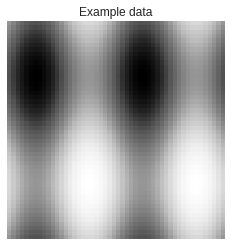

In [7]:
import matplotlib.pyplot as plt
import numpy as np
n_T = 50 # Dimension of sinusoidal data
omega_values = [2*np.pi, 4*np.pi] # Angular frequency of signals
phases1 = np.array(2*np.pi*np.linspace(0, 1, n_T))
phases2 = np.copy(phases1)
_, phase_images = sinusoid_image_phase_combination(phases1, phases2, n_T, omega_values)

# PLOT THE DATA TO VISUALIZE IT ONLY FOR n_Phi = 100
%matplotlib inline 
plt.imshow(phase_images[0,:,:])
plt.title("Example data")
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
experiment_name = '2DSimpleDecoder' # Code for the experiment
extra_comments ='Normal' # Extra comments of the experiment 
target_folder = "C:\\Users\\Luis Pérez\\Documents\\Master\\TUE\\Final Project\\TensorFlow Models"
folders = modules.savefolders.SaveFolders(target_folder, experiment_name, extra_comments)
log_dir_tensorboard = folders.get_logdir_tensorboard()
weights_folder = folders.get_weight_file()

Tensorboard address to copy paste:

C:\Users\LUISPR~1\DOCUME~1\Master\TUE\FINALP~1\TENSOR~1\models\2DSIMP~1\TENSOR~1


In [9]:
# Instantiate the VAE class
vae_parameters = {'latent_dim':4,
                  'mode':{'encoder':'Normal'},
                 'learning_rate':0.0001,
                 'shape':(50,50)}

vae = vae_nn_images(**vae_parameters)

Normal distribution chosen as encoder


In [ ]:
vae_training_parameters = {'train_data':phase_images,
                          'batch_size':2500,
                          'epochs': 2000,
                          'log_dir_tensorboard': "/tmp/",
                          'weights_folder': "/tmp/"}
vae.train_vae(**vae_training_parameters)

Initialization complete
Initializing parameters
Epoch 0 | Loss: 2.03E-02 | MSE: 2.01E-02 | KL: 1.84E-04
Epoch 1 | Loss: 2.01E-02 | MSE: 2.00E-02 | KL: 1.74E-05
Epoch 2 | Loss: 2.00E-02 | MSE: 2.00E-02 | KL: 9.09E-06
Epoch 3 | Loss: 2.00E-02 | MSE: 2.00E-02 | KL: 6.31E-06
Epoch 4 | Loss: 2.00E-02 | MSE: 2.00E-02 | KL: -9.51E-06
Epoch 5 | Loss: 2.00E-02 | MSE: 2.00E-02 | KL: -1.48E-05
Epoch 6 | Loss: 2.00E-02 | MSE: 2.00E-02 | KL: -7.05E-06
Epoch 7 | Loss: 2.00E-02 | MSE: 2.00E-02 | KL: 3.81E-06
Epoch 8 | Loss: 1.99E-02 | MSE: 1.99E-02 | KL: 1.17E-05
Epoch 9 | Loss: 1.99E-02 | MSE: 1.99E-02 | KL: 1.88E-05
Epoch 10 | Loss: 1.99E-02 | MSE: 1.98E-02 | KL: 3.09E-05
Epoch 11 | Loss: 1.98E-02 | MSE: 1.98E-02 | KL: 5.51E-05
Epoch 12 | Loss: 1.98E-02 | MSE: 1.97E-02 | KL: 9.16E-05
Epoch 13 | Loss: 1.97E-02 | MSE: 1.95E-02 | KL: 1.44E-04
Epoch 14 | Loss: 1.96E-02 | MSE: 1.94E-02 | KL: 1.90E-04
Epoch 15 | Loss: 1.95E-02 | MSE: 1.93E-02 | KL: 2.12E-04
Epoch 16 | Loss: 1.94E-02 | MSE: 1.92E-02 | KL:

## Test decoding

In [ ]:
from itertools import product
latent = vae.encode(phase_images, weights_folder)
phase_combinations = np.array(list(product(phases1, phases2)))

In [ ]:
%matplotlib qt5

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
ax = Axes3D(fig)
# Get colormap
colormap = mpl.cm.get_cmap('gray')
colors_linspace = np.linspace(0,1,100+1)
x_direction = 2
y_direction = 0
z_direction = 1
phase_dir = 0
for num_phase, phase in enumerate(phases1):
    ax.scatter(latent[phase_combinations[:,phase_dir]==phase,x_direction], 
                   latent[phase_combinations[:,phase_dir]==phase,y_direction],
                   latent[phase_combinations[:,phase_dir]==phase,z_direction],
                   c=colormap(colors_linspace[num_phase]))
    ax.set_xlabel('Z'+str(x_direction))
    ax.set_ylabel('Z'+str(y_direction))
    ax.set_zlabel('Z'+str(z_direction))
#     ax.legend()
fig.show()